# Research Question 1: River extent of influence

What is the spatial extent of influence of the river contribution to surface waters in the CAA?
- Does the RCD span full straits in the CAA? If so, which and during all seasons or only for a portion of the year?
- How long does it take for river contributions in the central CAA to reach Baffin Bay?

Correlate the time series of discharge and fluxes

In [1]:
import os
os.environ['PROJ_LIB'] = '/home/brogalla/anaconda3/share/proj'

In [77]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from dateutil.relativedelta import relativedelta
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import netCDF4 as nc
from itertools import compress
import datetime as dt
from scipy.signal import find_peaks

%matplotlib inline

##### Load domain dimensions for reference:

In [5]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])
cond = (tmask[0,:,:,:] > 0.1) 
land_mask = np.ma.masked_where(cond, tmask[0,:,:,:])

mesh  = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12-EXH006_5d_gridT_y2002m01d05.nc')
lons  = np.array(mesh.variables['nav_lon'])
lats  = np.array(mesh.variables['nav_lat'])
tmask = tmask[0,:,imin:imax,jmin:jmax]

In [6]:
ref   = nc.Dataset('/data/brogalla/run_storage/trial3/ref-2003/ANHA12_EXH006_2003_monthly.nc',  'r')
tlons = np.array(ref.variables['nav_lon'])
tlats = np.array(ref.variables['nav_lat'])
depth = np.array(ref.variables['deptht'])

##### Load boundary coordinates:

In [4]:
imin, imax = 1480, 2050
jmin, jmax = 160, 800

In [12]:
x1=imin
y1=jmin

l1i = 2013-x1; l1j = np.arange(300-y1,392-y1)
l2i = 1935-x1; l2j = np.arange(450-y1,530-y1)
l3i = np.arange(1850-x1,1885-x1); l3j = 555-y1
l4i = np.arange(1753-x1,1837-x1); l4j = 568-y1
l5i = np.arange(1720-x1,1790-x1); l5j = 605-y1
l6i = 1730-x1; l6j = np.arange(660-y1,690-y1)

t1i = np.arange(1635-x1,1653-x1); t1j = 760-y1

r1i = 1520-x1; r1j = np.arange(505-y1,673-y1)
r2i = 1520-x1; r2j = np.arange(385-y1,405-y1)

#### Load pickled time series calculations (5d):

In [7]:
def time_series_pickle(year, riv_2a=False):
    # Load calculated time series of fluxes:
    if riv_2a:
        time_series_V1, time_series_V2, time_series_V3, time_series_V4, time_series_V5, time_series_V6,time_series_V7,\
        time_series_V8, time_series_V9, time_series_mn1, time_series_mn2, time_series_mn3, time_series_mn4, \
        time_series_mn5, time_series_mn6, time_series_mn7, time_series_mn8, time_series_mn9 = \
            pickle.load(open('time-series-riv-2a'+str(year)+'.pickle','rb'))        
    else:
        time_series_V1, time_series_V2, time_series_V3, time_series_V4, time_series_V5, time_series_V6,time_series_V7,\
        time_series_V8, time_series_V9, time_series_mn1, time_series_mn2, time_series_mn3, time_series_mn4, \
        time_series_mn5, time_series_mn6, time_series_mn7, time_series_mn8, time_series_mn9 = \
                pickle.load(open('time-series-'+str(year)+'.pickle','rb'))
    
    # Conservation of volume check:
    sum_V = -1*np.sum(time_series_V1,axis=2) - np.sum(time_series_V2,axis=2) - np.sum(time_series_V7,axis=2) - \
           (np.sum(time_series_V3,axis=2) + np.sum(time_series_V4,axis=2) + np.sum(time_series_V5,axis=2) + \
            np.sum(time_series_V6,axis=2)) + np.sum(time_series_V8,axis=2) + np.sum(time_series_V9,axis=2)
#     print('Total volume change at end of time period: ', np.sum(sum_V))
    
    # Combine western CAA time series:
    time_series_mn_WCAA = np.sum(np.sum(time_series_mn3,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_mn4,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_mn5,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_mn6,axis=2),axis=1)
    time_series_V_WCAA = np.sum(np.sum(time_series_V3,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_V4,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_V5,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_V6,axis=2),axis=1)
    
    return time_series_mn1, time_series_mn2, time_series_mn_WCAA, time_series_mn7, time_series_mn8, time_series_mn9

In [8]:
ts_2002_mn1, ts_2002_mn2, ts_2002_mn_WCAA, ts_2002_mn7, ts_2002_mn8, ts_2002_mn9 = time_series_pickle(2002)
ts_2003_mn1, ts_2003_mn2, ts_2003_mn_WCAA, ts_2003_mn7, ts_2003_mn8, ts_2003_mn9 = time_series_pickle(2003)
ts_2004_mn1, ts_2004_mn2, ts_2004_mn_WCAA, ts_2004_mn7, ts_2004_mn8, ts_2004_mn9 = time_series_pickle(2004)
ts_2005_mn1, ts_2005_mn2, ts_2005_mn_WCAA, ts_2005_mn7, ts_2005_mn8, ts_2005_mn9 = time_series_pickle(2005)
ts_2006_mn1, ts_2006_mn2, ts_2006_mn_WCAA, ts_2006_mn7, ts_2006_mn8, ts_2006_mn9 = time_series_pickle(2006)
ts_2007_mn1, ts_2007_mn2, ts_2007_mn_WCAA, ts_2007_mn7, ts_2007_mn8, ts_2007_mn9 = time_series_pickle(2007)
ts_2008_mn1, ts_2008_mn2, ts_2008_mn_WCAA, ts_2008_mn7, ts_2008_mn8, ts_2008_mn9 = time_series_pickle(2008)
ts_2009_mn1, ts_2009_mn2, ts_2009_mn_WCAA, ts_2009_mn7, ts_2009_mn8, ts_2009_mn9 = time_series_pickle(2009)
ts_2010_mn1, ts_2010_mn2, ts_2010_mn_WCAA, ts_2010_mn7, ts_2010_mn8, ts_2010_mn9 = time_series_pickle(2010)
ts_2011_mn1, ts_2011_mn2, ts_2011_mn_WCAA, ts_2011_mn7, ts_2011_mn8, ts_2011_mn9 = time_series_pickle(2011)
ts_2012_mn1, ts_2012_mn2, ts_2012_mn_WCAA, ts_2012_mn7, ts_2012_mn8, ts_2012_mn9 = time_series_pickle(2012)
ts_2013_mn1, ts_2013_mn2, ts_2013_mn_WCAA, ts_2013_mn7, ts_2013_mn8, ts_2013_mn9 = time_series_pickle(2013)
ts_2014_mn1, ts_2014_mn2, ts_2014_mn_WCAA, ts_2014_mn7, ts_2014_mn8, ts_2014_mn9 = time_series_pickle(2014)
ts_2015_mn1, ts_2015_mn2, ts_2015_mn_WCAA, ts_2015_mn7, ts_2015_mn8, ts_2015_mn9 = time_series_pickle(2015)

### Time series across boundaries:

- Positive --- into domain
- Negative --- out of domain

In [9]:
def file_dates(year):
    #start_date and end_date are datetime objects
    start_date = dt.datetime(year,1,1)
    end_date   = dt.datetime(year,12,31)
    
    file_list1 = np.sort(os.listdir('/data/brogalla/run_storage/trial4/ref-'+str(year)+'/'))
    file_list2 = np.sort(os.listdir('/data/brogalla/ANHA12/'))
    
    Vlist = [i[26:31]=='gridV' for i in file_list2]
    gridV_list = list(compress(file_list2, Vlist))
    dateV_list = [dt.datetime.strptime(i[14:25], "y%Ym%md%d") for i in gridV_list]
    gridV_file_list = list(compress(gridV_list, [V > start_date and V < end_date for V in dateV_list]))
    
    dates = [dt.datetime.strptime(i[14:25], "y%Ym%md%d") for i in gridV_file_list]
    
    return dates

In [10]:
dates_2002 = file_dates(2002); dates_2003 = file_dates(2003); dates_2004 = file_dates(2004);
dates_2005 = file_dates(2005); dates_2006 = file_dates(2006); dates_2007 = file_dates(2007);
dates_2008 = file_dates(2008); dates_2009 = file_dates(2009); dates_2010 = file_dates(2010);
dates_2011 = file_dates(2011); dates_2012 = file_dates(2012); dates_2013 = file_dates(2013);
dates_2014 = file_dates(2014); dates_2015 = file_dates(2015);

In [65]:
dates = np.array(dates_2002+dates_2003+dates_2004+dates_2005+dates_2006+dates_2007+dates_2008+dates_2009+\
                 dates_2010+dates_2011+dates_2012+dates_2013+dates_2014+dates_2015)

Separated by layer: (year, 5day within year)

In [12]:
def flux_layer(top, bottom):
    in_BB  = np.empty((14, 72))
    out_BB = np.empty((14, 72))

    count = 0
    for year in range(2002, 2016):
        ts_year_mn1, ts_year_mn2, ts_year_mn_WCAA, ts_year_mn7, ts_year_mn8, ts_year_mn9 = time_series_pickle(year)

        for date in range(0,72):
            in_BB[count,date]  = np.sum(ts_year_mn8[date, top:bottom, :][ts_year_mn8[date, top:bottom, :] >= 0])
            out_BB[count,date] = np.sum(ts_year_mn8[date, top:bottom, :][ts_year_mn8[date, top:bottom, :] < 0])

        count+=1
        
    return in_BB, out_BB

In [14]:
in_BB_surf, out_BB_surf   = flux_layer(0, 18)
in_BB_total, out_BB_total = flux_layer(0, 50)

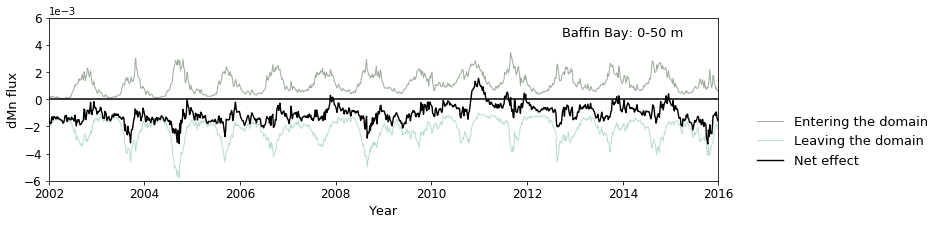

In [292]:
fig, ax = plt.subplots(1,1, figsize=(12,3))

ax.plot(dates, in_BB_surf.flatten(),  c='#9dac9c', linewidth=1.0, label='Entering the domain')
ax.plot(dates, out_BB_surf.flatten(), c='#b8ded3', linewidth=1.0, label='Leaving the domain')
ax.plot(dates, out_BB_surf.flatten()+in_BB_surf.flatten(), c='k', linewidth=1.4, label='Net effect')
ax.plot([dates_2002[0], dates_2015[-1]], [0, 0], '-k')

ax.set_xlim([dt.datetime(2002,1,1), dt.datetime(2016,1,1)])
ax.set_ylim([-6e-3, 6e-3])
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel('Year',fontsize=13)
ax.set_ylabel('dMn flux', fontsize=13)
ax.text(dates_2012[-20], 4.6e-3, 'Baffin Bay: 0-50 m', fontsize=13)

ax.legend(loc=(1.05, 0.05), frameon=False, fontsize=13)
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/BB-time-series-20190925-surface.png', bbox_inches='tight')

Load river discharge information

In [49]:
rf = np.empty((15*12, 2400, 1632))

i=0
for year in range(2002, 2016):
    for month in range(0,12):
        c = nc.Dataset('/data/brogalla/runoff/ANHA12_runoff_monthly_combined_Dai_Trenberth_Bamber_y'+str(year)+'.nc','r')
        rf[i*12+month,:,:] = np.array(c.variables['runoff'])[month,:,:]
        
    i+=1

In [50]:
rf_time_series = np.sum(rf, axis=(1,2))

In [51]:
months = np.array([dates[0] + relativedelta(months=i) for i in range(0,180)])

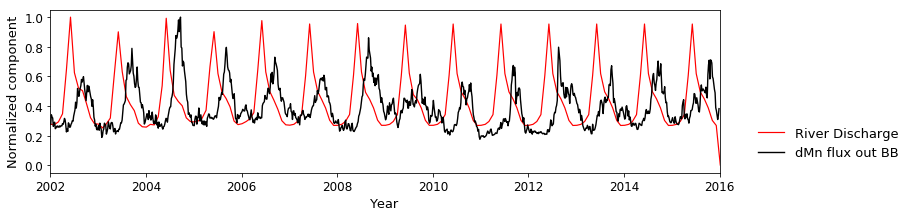

In [56]:
fig, ax = plt.subplots(1,1, figsize=(12,3))

ax.plot(months, rf_time_series/np.amax(rf_time_series), c='r', linewidth=1.2, label='River Discharge')
ax.plot(dates, -1*out_BB_surf.flatten()/np.amax(np.abs(out_BB_surf)), c='k', linewidth=1.4, label='dMn flux out BB')

ax.set_xlim([dt.datetime(2002,1,1), dt.datetime(2016,1,1)])
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel('Year',fontsize=13)
ax.set_ylabel('Normalized component', fontsize=13)

ax.legend(loc=(1.05, 0.05), frameon=False, fontsize=13)
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/BB-time-series-20190925-surface.png', bbox_inches='tight')

Identify the temporal lag:

In [117]:
norm_rf = rf_time_series/np.amax(rf_time_series)
norm_mn = -1*out_BB_surf.flatten()/np.amax(np.abs(out_BB_surf))

In [125]:
rf_i, _ = find_peaks(norm_rf, width=1)
mn_i, _ = find_peaks(norm_mn, width=8)

In [150]:
diff1 = months[rf_i][0:4]-dates[mn_i][0:4]
diff2 = months[rf_i][4:9]-dates[mn_i][5:10]
diff3 = months[rf_i][10:14]-dates[mn_i][10:14]

In [153]:
d1 = [i.days for i in diff1]
d2 = [i.days for i in diff2]
d3 = [i.days for i in diff3]

In [156]:
time_lag = np.abs(d1 + d2 + d3) # in days
print('Average lag time (days): ', np.average(time_lag))
print('Maximum lag time (days): ', np.amax(time_lag))
print('Minimum lag time (days): ', np.amin(time_lag))
print('Standard deviation of lag time (days): ', np.std(time_lag))

Average lag time (days):  100.92307692307692
Maximum lag time (days):  139
Minimum lag time (days):  69
Standard deviation of lag time (days):  17.600094136380847


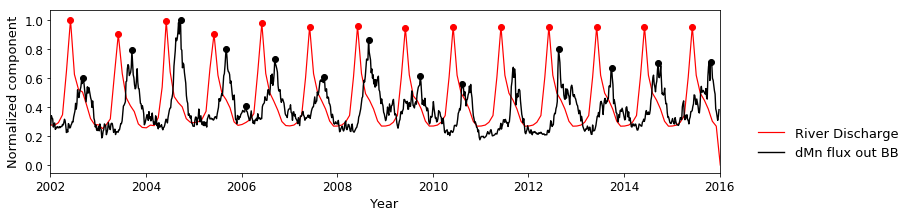

In [100]:
fig, ax = plt.subplots(1,1, figsize=(12,3))

ax.scatter(dates[mn_i], norm_mn[mn_i], c='k')
ax.scatter(months[rf_i], norm_rf[rf_i],  c='r')

ax.plot(months, rf_time_series/np.amax(rf_time_series), c='r', linewidth=1.2, label='River Discharge')
ax.plot(dates, -1*out_BB_surf.flatten()/np.amax(np.abs(out_BB_surf)), c='k', linewidth=1.4, label='dMn flux out BB')

ax.set_xlim([dt.datetime(2002,1,1), dt.datetime(2016,1,1)])
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel('Year',fontsize=13)
ax.set_ylabel('Normalized component', fontsize=13)

ax.legend(loc=(1.05, 0.05), frameon=False, fontsize=13)
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/BB-time-series-20190925-surface.png', bbox_inches='tight')

Select rivers from within certain regions:

In [ ]:
rf = np.array(rf)
lon_rf = np.array(lon_rf)
lat_rf = np.array(lat_rf)
rf[rf == 0] = np.nan
lon_rf[rf == 0.0] = np.nan
lat_rf[rf == 0.0] = np.nan

proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x_rf, y_rf = proj(lon_rf, lat_rf)
CS = proj.scatter(x_rf[combined_monthly>0], y_rf[combined_monthly>0], \
                  c=combined_monthly[combined_monthly>0], vmax=10, s=60, cmap=cmocean.cm.amp, zorder=3)
CBar = plt.colorbar(CS, shrink=0.6)
CBar.set_label('dMn contribution [nM]', fontsize=12)
CBar.ax.tick_params(axis='y', length=0)